# Unsupervised Learning - Dimensionality Reduction



## First Part - Necessary Code

In [1]:

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import json
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [2]:
X, y = make_blobs(n_samples=200, centers=3, n_features=3,random_state=24)


In [3]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

# Define color map for plotting
color_map = ListedColormap([c_blue, c_dark,c_light])




#colors = {
#    '0':"#FF5A36", 
#    '1':"#193251",
#    '2':"#99D04A"
#}
#
#color_map = [colors[str(_)] for _ in y]

In [5]:
def one_D_plot():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0],[0]*200,c=y,cmap=color_map, s=160)
    ax.grid(True)
    ax.set_frame_on(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.get_xaxis().tick_bottom()
    xmin, xmax = ax.get_xaxis().get_view_interval()
    ymin, ymax = ax.get_yaxis().get_view_interval()
    ax.add_artist(Line2D((0, xmax), (0, 0), color='black', linewidth=2))
    # fig.savefig('1d_blobs_wo_distance.png', dpi=300)

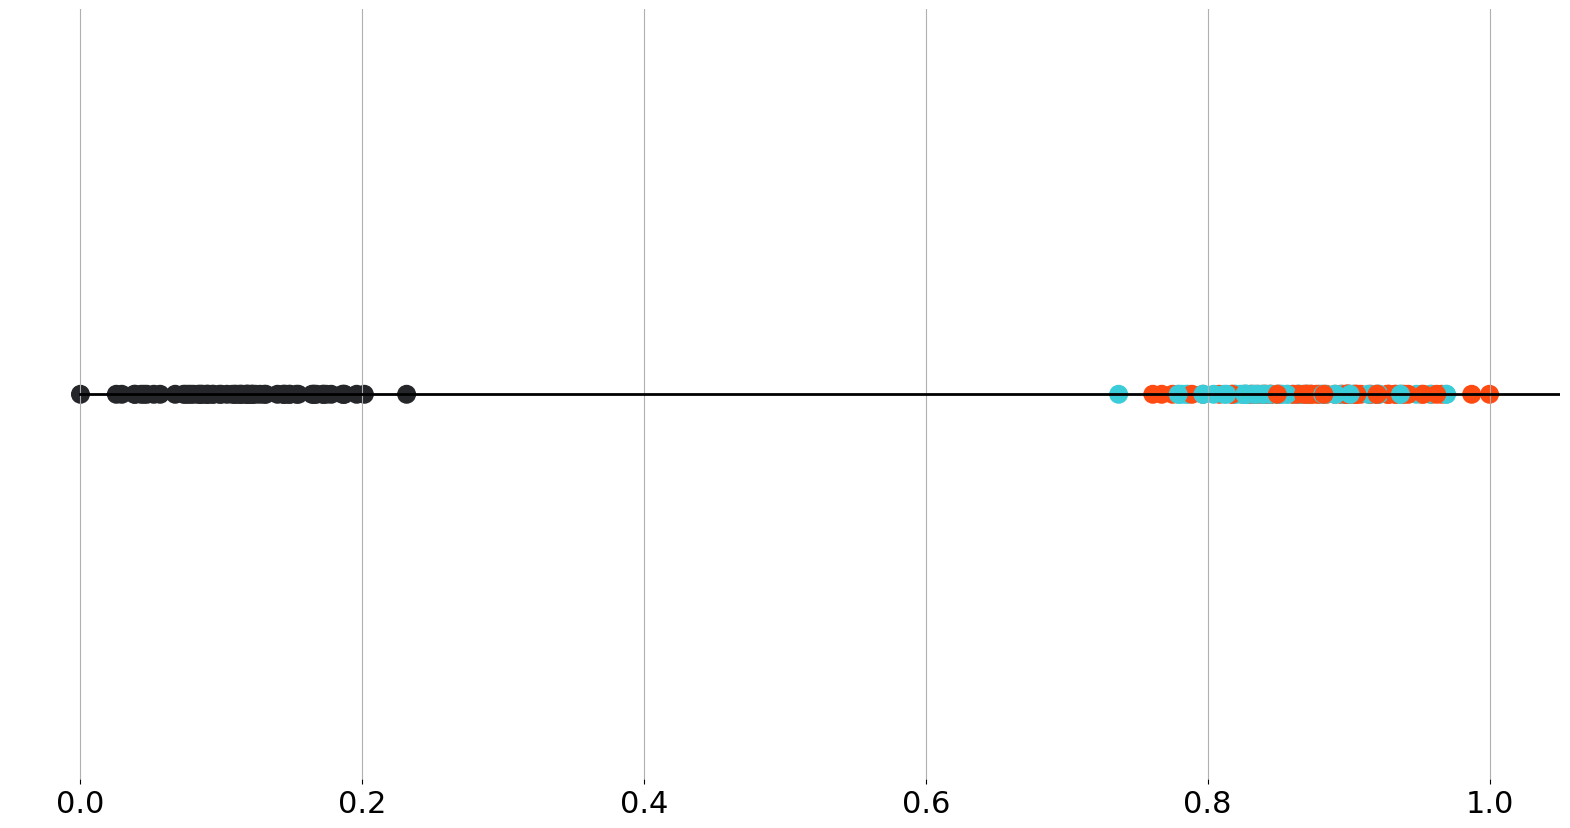

In [6]:
one_D_plot()

In [7]:
def one_D_distance_plot():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0],[0]*200,c=y,cmap=color_map, s=120)
    ax.scatter(X[17,0],[0],c='r',s=280)
    ax.scatter(X[13,0],[0],c='r',s=280)
    ax.plot([X[13,0],X[17,0]],[0,0], [0],linewidth=4)
    ax.grid(True)
    ax.set_frame_on(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.get_xaxis().tick_bottom()
    xmin, xmax = ax.get_xaxis().get_view_interval()
    ymin, ymax = ax.get_yaxis().get_view_interval()
    ax.add_artist(Line2D((0, xmax), (0, 0), color='black', linewidth=2))
    #fig.savefig('1d_blobs_w_distance.png', dpi=300)

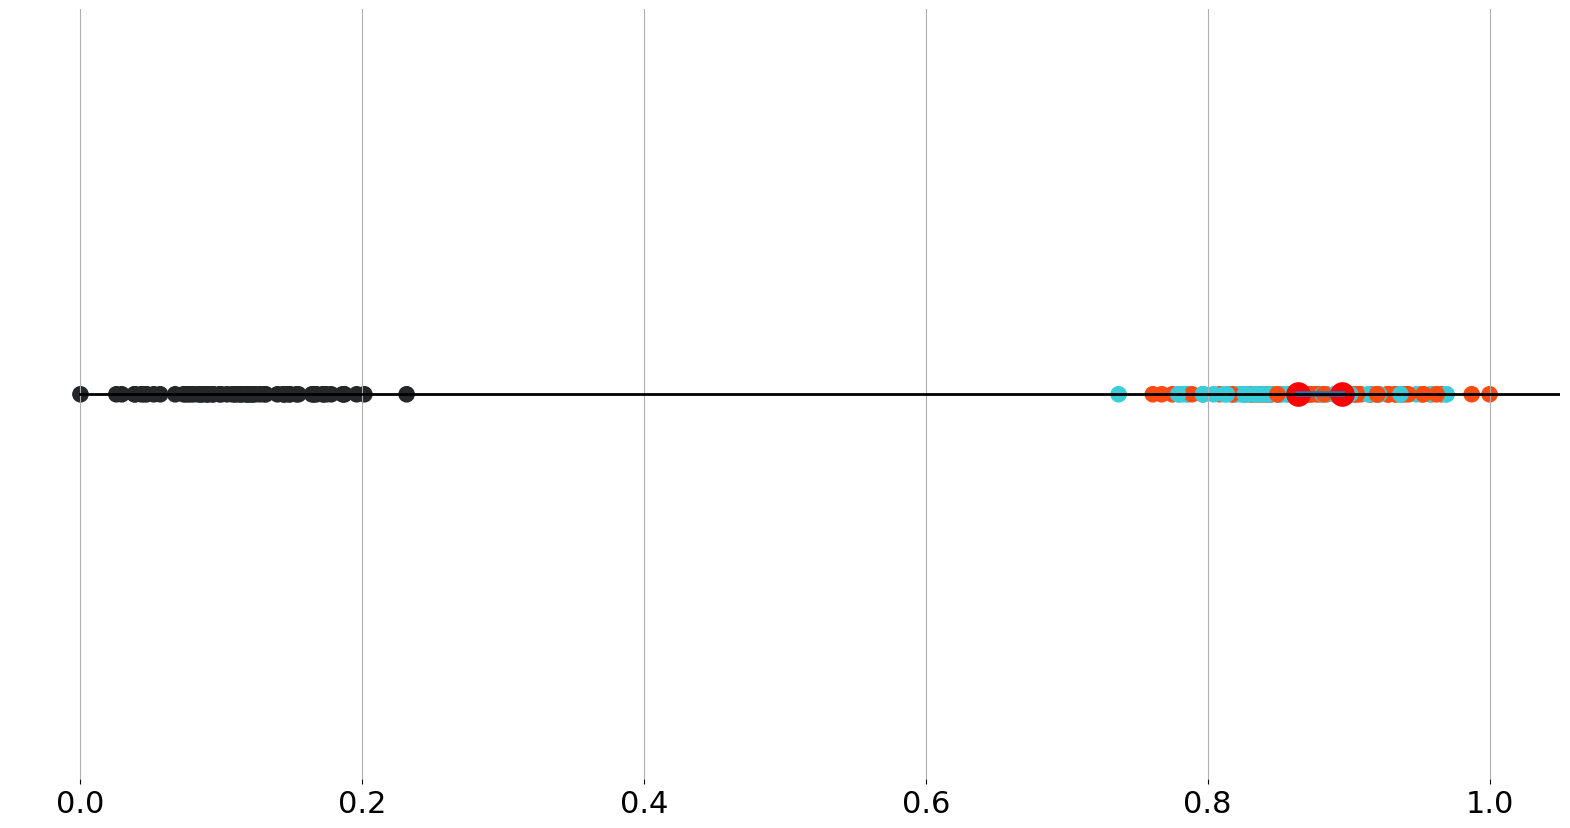

In [8]:
one_D_distance_plot()

In [9]:
def two_D_plot():
    plt.scatter(X[:,0],X[:,1],c=y,cmap=color_map, s=120)
    plt.grid(True)
    #plt.savefig('2d_blobs_wo_distance.png', dpi=300)

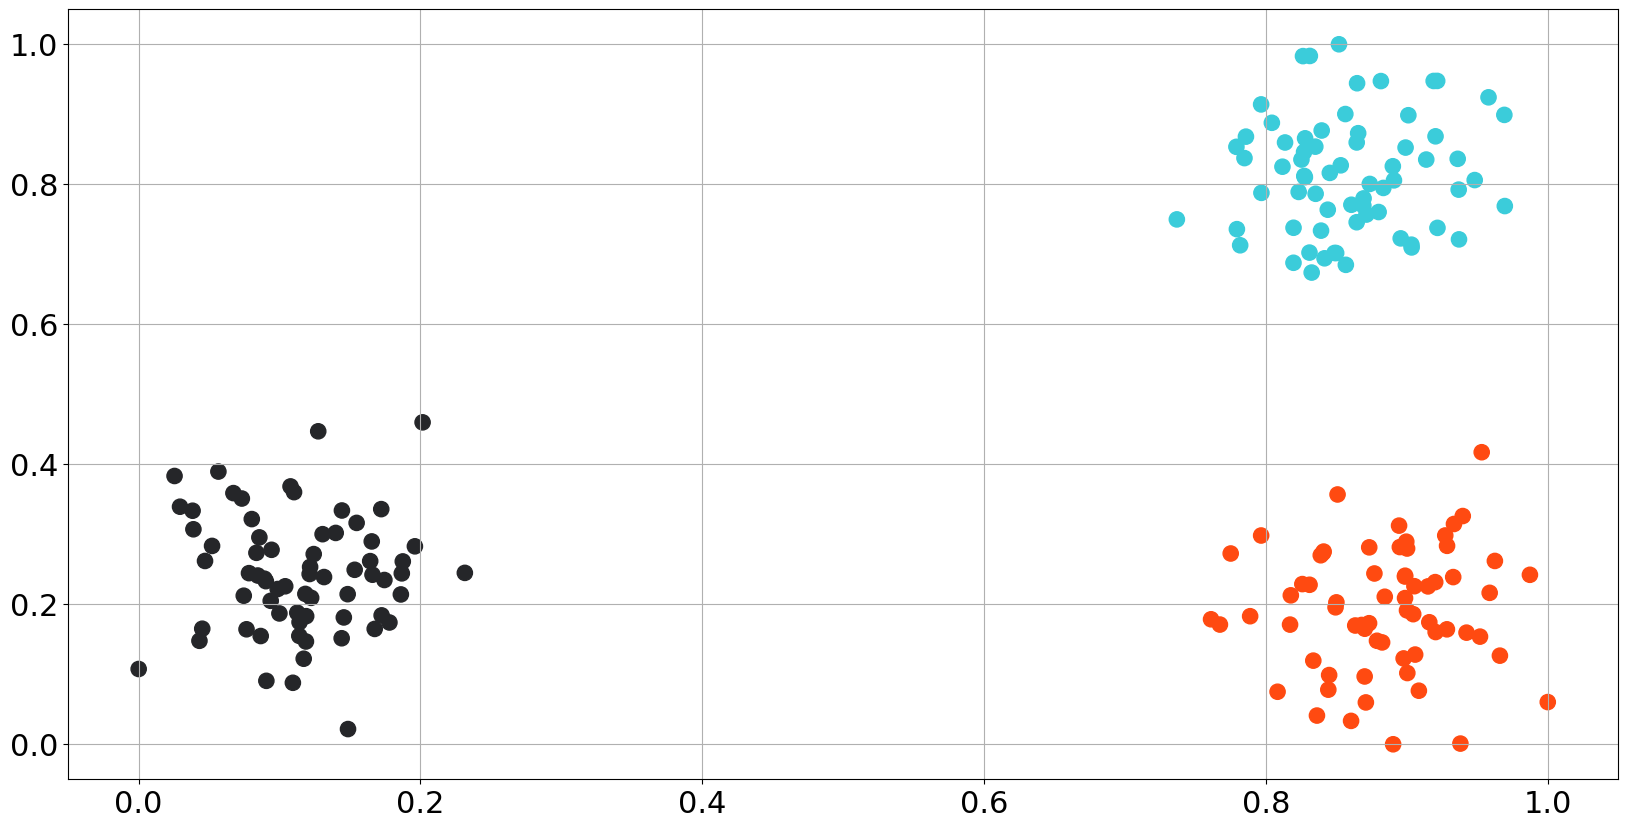

In [10]:
two_D_plot()

In [11]:
def two_D_distance_plot():
    plt.scatter(X[:,0],X[:,1],c=y,cmap=color_map, s=120)
    plt.scatter(X[13,0],X[13,1],c=c_dark,s=160)
    plt.scatter(X[17,0],X[17,1],c=c_dark,s=160)
    plt.plot([X[13,0],X[17,0]],[X[13,1],X[17,1]],linewidth=3,c=c_dark)
    plt.grid(True)
    #plt.savefig('2d_blobs.png', dpi=300)

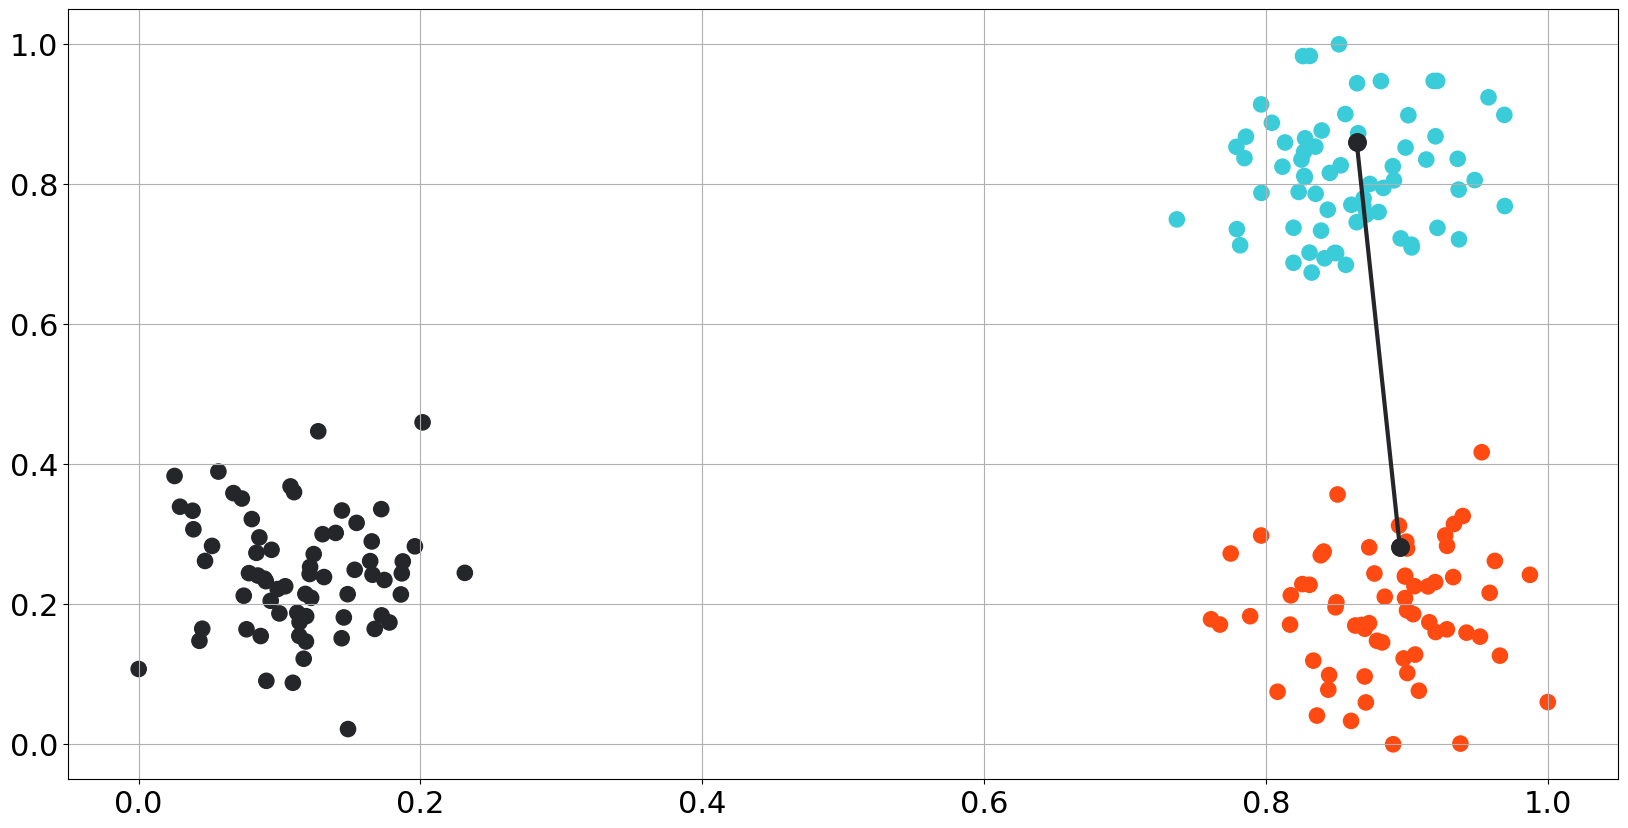

In [12]:
two_D_distance_plot()

In [13]:
def three_D_plot():
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap=color_map,s=120, depthshade=True)
    #fig.savefig('3d_blobs_wo_distance.png', dpi=300)

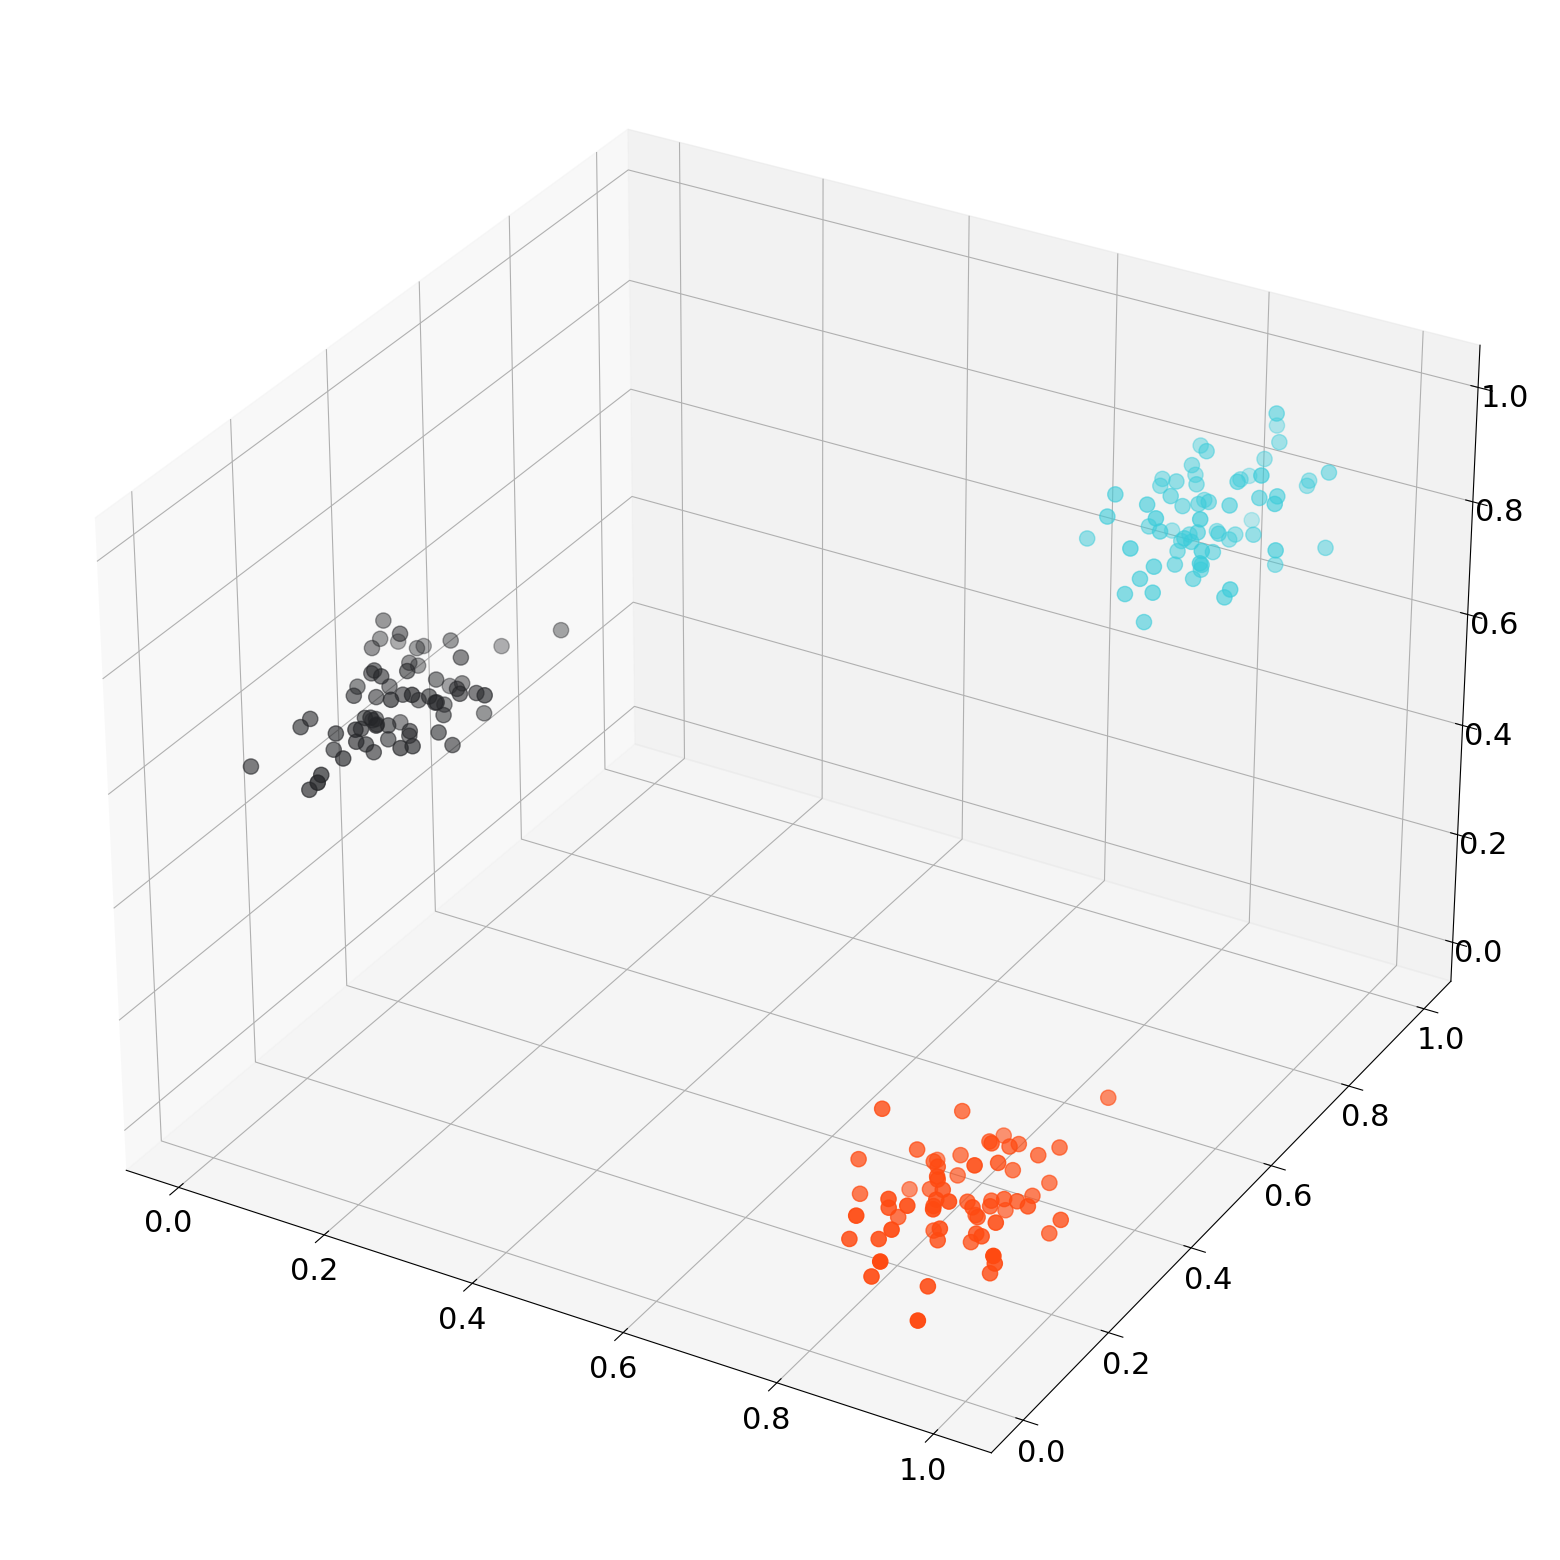

In [14]:
three_D_plot()

In [15]:
def three_D_distance_plot():
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap=color_map,s=120, depthshade=True)
    ax.scatter(X[13,0],X[13,1],X[13,2],c='r',s=160, depthshade=True)
    ax.scatter(X[17,0],X[17,1],X[17,2],c='r',s=160, depthshade=True)
    ax.plot([X[13,0],X[17,0]],[X[13,1],X[17,1]], [X[13,2],X[17,2]],linewidth=4)
    #fig.savefig('3d_blobs_w_distance.png', dpi=300)

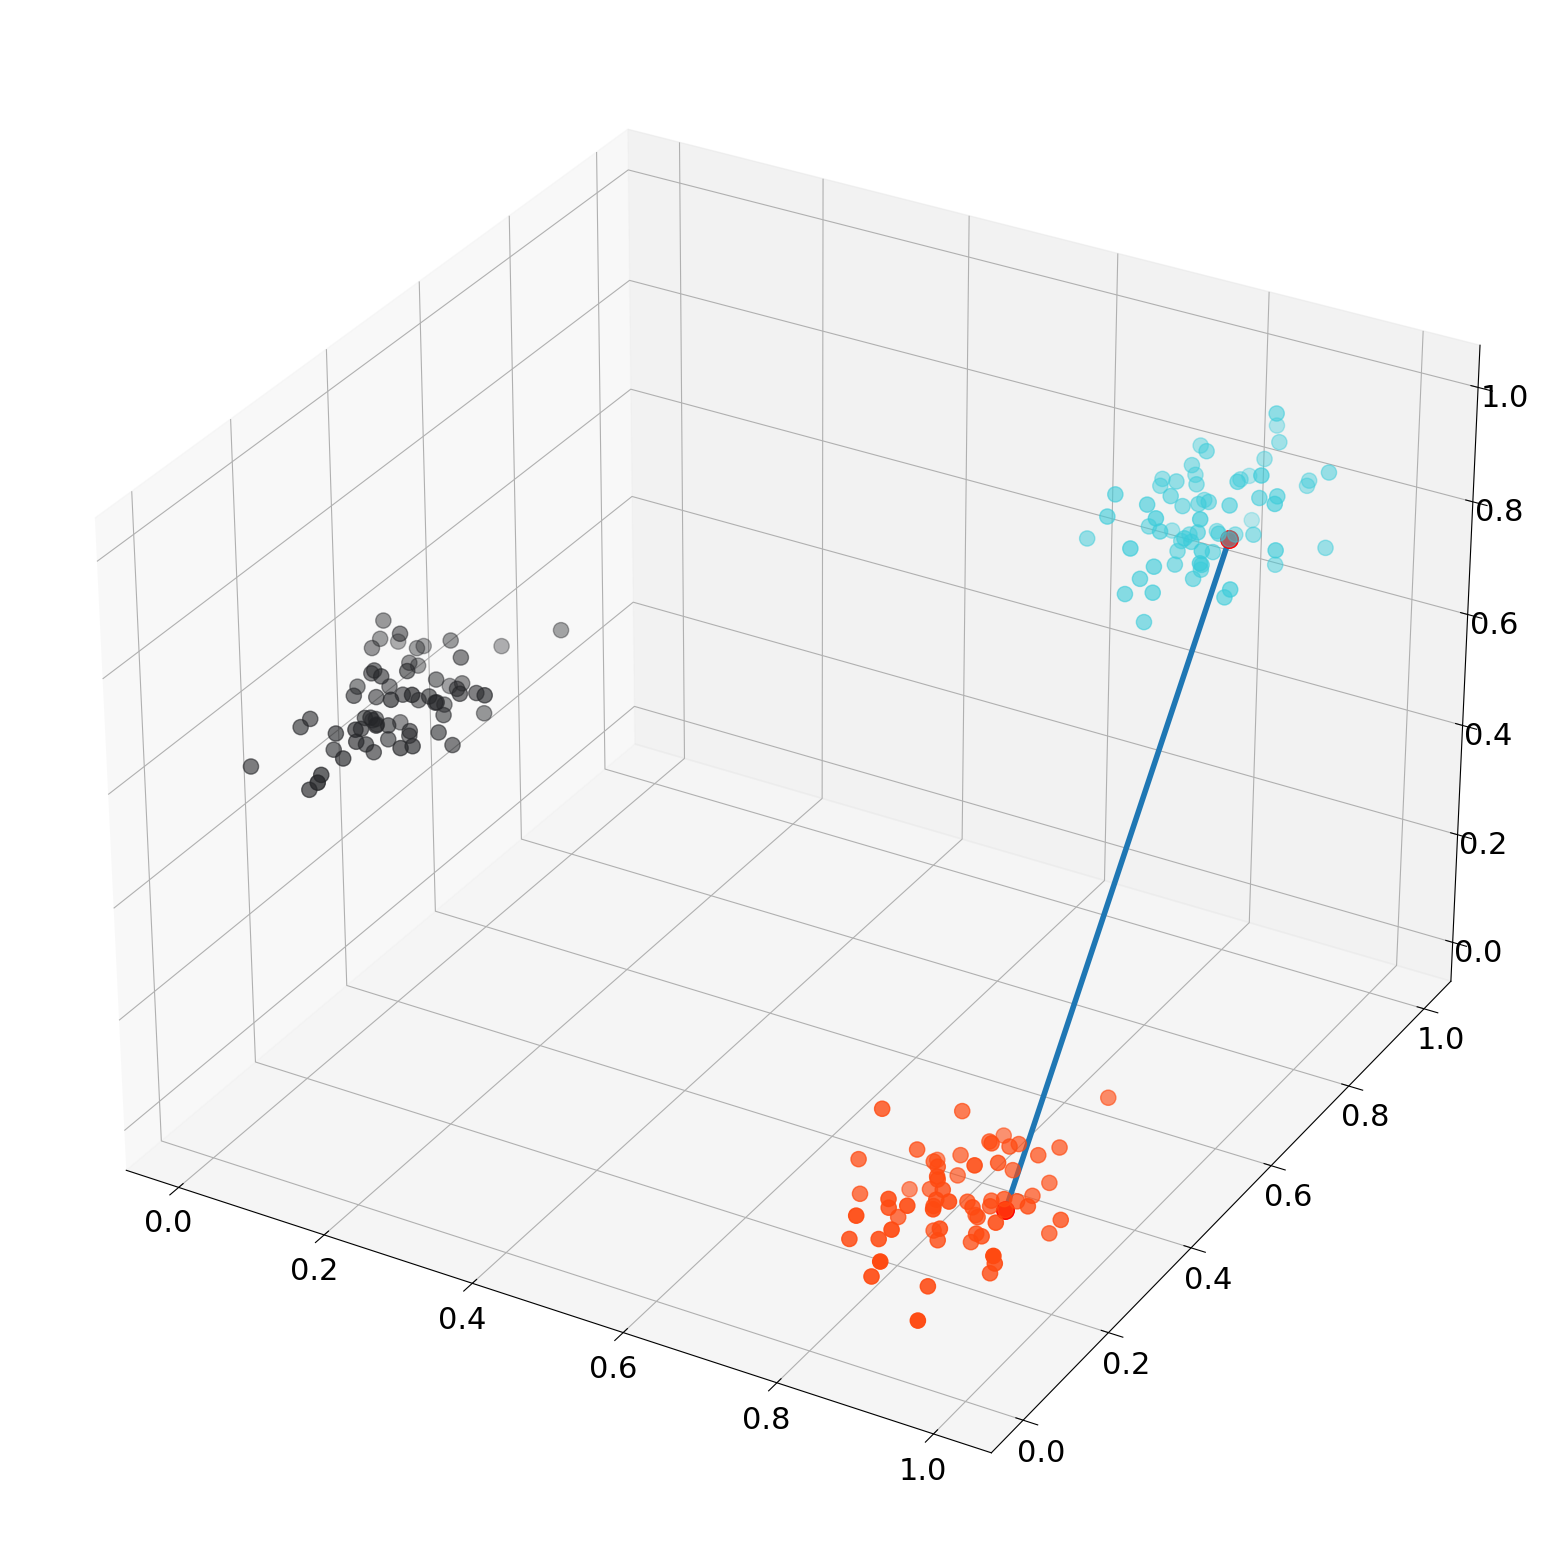

In [16]:
three_D_distance_plot()

In [17]:
def euclidean_distance(point_1, point_2):  
    calc_euclidean = 0
    for i in range(len(point_1)):
        calc_euclidean += (point_1[i] - point_2[i])**2
    calc_euclidean = np.sqrt(calc_euclidean)
    print(round(calc_euclidean,2))

In [18]:
point_1_1d = (X[13,0],0)
point_2_1d = (X[17,0],0)
euclidean_distance(point_1_1d, point_2_1d)

0.03


In [19]:

point_1_2d = (X[13,0],X[13,1])
point_2_2d = (X[17,0],X[17,1])
euclidean_distance(point_1_2d, point_2_2d)

0.58


## Second Part - Lecture

<div class="slide-title">
    
# Unsupervised Learning
    
</div> 

Notes: Q: who can tell me the difference between supervised and unsupervised learning? (what did we have in supervised learning what we dont have in unsupervised learning?)


![img_p2_1](../images/dimensionality_reduction/img_p2_1.png)


## Unsupervised learning

Statistical methods that extract meaning from data **without**
training a model on **labeled data**

**Unsupervised learning** also constructs a model of the data but
it doesn't distinguish between target and predictor variables
* finding groups of data → **Clustering**
* reducing the dimensions of the data to a more manageable set of variables → **Dimensionality Reduction**
* extension to EDA - when you have large number of variables and records


<div class="slide-chapter-split">
    <div class="title-chapter">Dimensionality reduction</div>
    <div class="image-container">
        <img src="../images/dimensionality_reduction/compression.png" alt="asd">
    </div>
</div>



### The curse of Dimensionality: Intuition 

<div class="group">
    <div class="text">

To which category does x belong to?

Blue / Red / Green?
        
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p5_1.png">
    </div>
</div>


<div class="group">
    <div class="text">
        
**Intuition:** The identity of x should be determined more strongly
by nearby training points and less so by further away training
points
        
</div>




<div class="group">
    <div class="text">

Simple approach: Divide in cells
x belongs to the majority class in it's
cell
        
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p7_1.png">
    </div>
</div>

**What if we have more dimensions?**

Notes: Tile Coding, Bucketized Columns

### The curse of Dimensionality: Intuition

<div class="group">
    <div class="text">

Do you think in all plots are the same amount of points?
       <img src="../images/dimensionality_reduction/img_p9_1.png">
        <img src="../images/dimensionality_reduction/img_p9_2.png">
        
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p9_3.png">
    </div>
</div>



Notes: do you think in all plots are the same amount of points? → yes do you think there is the same volume of whitespace in these plots? → same amount of points, but more dimensions == more sparsity of data

## The curse of Dimensionality
If we divide a region of a space into regular cells, the number of
**cells grows exponentially** with the dimensionality of the space

Why is this a problem?


![img_p10_1](../images/dimensionality_reduction/img_p10_1.png)





Notes: why is this a problem? —> if you have boxes without data, then you cannot say anything about this region of space. as the number of cells grow exponentially, there will be more and more boxes without data. → exponentially more data on train time for increasing feature space to not fall into the trap of the curse of dimensionality, to still have dense data.


How many data points do we need to cover all the cells?



We would need exponentially large quantity of training data to ensure all cells are filled

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
Sparse data: when you do not have data covering all cells!

</div>




Notes: where did you run into this before? ---> get_dummies


## The curse of Dimensionality II

<div class="group">
<div class="text">
 
Volume of a sphere of radius R in D dimensions is: $$ V_D\propto R^D $$

**What is the fraction of volume of the  sphere that lies in the outer shell?**

    
</div>
<div class="images">
</div>
</div>



<div class="group">
<div class="text">

I.e. between radius $r_\text{i} = 1 - \epsilon $ (where $ \epsilon $ is the thickness of the shell) and $r_\text{total}$ = 1 ?

$$\begin{align}
 \frac{V_\text{Shell}}{V_\text{Total}} = \frac{V_\text{Total}-V_\text{Inner}}{V_\text{Total}} = \frac{1^D - (1 -\epsilon)^{D}}{1^{D}}= 1 - (1 -\epsilon)^{D}
\end{align}$$

</div>
<div class="images">
<img src="../images/dimensionality_reduction/img_p13_3.png" width="800"/>
</div>
</div>

<div class="group">
<div class="text_70">

<img src="../images/dimensionality_reduction/despair.png" width="400" align="right"/>

</div>
<div class="image_30">
<h3> WHYYYYYYY!!????</h3>
</div>
</div>

Notes: e=0.1 1 - (1-e)^D -> D = 1: 0.1 1 - (1-e)^D -> D = 100: 0.9999 (where do you get more volume/bites when you buy a donut? at the donut or at the hole inside?) drawing a circle with radius=1, and then an inner circle with radius=1-epsilon, to showcase different epsilon values and check what the diagram on the right is telling us about this volume at D=2. and then for higher dimensions… most of the volume is located on the surface of the spere (concentrated in a thin layer near the surface)

### The curse dimensions..
we can still apply pattern recognition techniques to
high-dimensionality data by exploiting these properties of **real data:**

* may be **confined to a region** of the space having lower dimensionality, the directions over which important features may vary can be confined
* will typically exhibit some **smoothness properties** and small changes in the input variables will produce small changes in the  target variable
    - use local-interpolation techniques to make predictions for new values




## The Manifold Hypothesis

Real-world high-dimensional data lies on low-dimensional
manifolds
* manifolds are embedded within the high-dimensional space
* manifolds are topological spaces that behave locally like
Euclidean spaces

[](https://deepai.org/machine-learning-glossary-and-terms/manifold-hypothesis)https://deepai.org/machine-learning-glossary-and-terms/manifold-hypothesis



Notes: Part of the manifold definiton is, that LOCALY, the rules of eucledian space holds true. If, in the space of all possible pictures, we only take the pictures that show a face, all the faces form a manifold. If you take fotos of two very similar faces (i.e. twins), an interpolation between these fotos will still show a reasonable face. If, however we try this in a less “local” environment, i.e. between the faces of Merkel and Obama, the result will at least be a weird face, more probably not a proper face. Hence, since the points where not local enough, the interpolation between them is not necessarily on the same manifold.

### Manifold Hypothesis - Intuition

<div class="group">
    <div class="text_70">
        
“Most real-world high-dimensional datasets lie close to a much
lower-dimensional manifold”
* typical example: swiss roll
* 2D plane, bent and twisted in 3rd dimension
* one dimension: line, circle, but not an 8
* two dimensions: surface, sphere, plane


    * purpose is to **unroll the swiss roll**
    * the **real euclidean distance** between the two points is the solid line, not the dotted one

        
</div>
    <div class="images_30">
        <img src="../images/dimensionality_reduction/img_p17_2.png">
        <img src="../images/dimensionality_reduction/img_p17_1.png">
    </div>
</div>


Notes: 8 not a manifold: Crossing point does not resemble a line example: swiss roll/ franzbrötchen. Try to eat a franzbrötchen in the real euclidean distance… the goal is to unroll the manifold

### Getting the best point of view = maximizing the line of sight

![img_p18_0](../images/dimensionality_reduction/img_p18_0.png)

Notes: get the best point of view of the data. In data that would be the variance.

### Getting the best point of view = maximizing the line of sight

![img_p18_1](../images/dimensionality_reduction/img_p18_1.png)

Notes: In data that would be the variance.

### Advantages

<div class="group">
    <div class="text_70">
        
+ Speeds up subsequent algorithm
+ Data compression without substantial loss of information
+ Helps visualizing patterns
+ Can improve results through noise reduction (only sometimes)
   
</div>
    <div class="images_30">
        <img src="../images/dimensionality_reduction/img_p20_1.png", width="500">
        <img src="../images/dimensionality_reduction/img_p20_2.png", width="500">
    </div>
</div>




Notes: we try do do data compression without substantial loss of information the outside of the images is always the same, so it doesn't give you much information which number it is. You can just drop the unimportant pixels → having less dimensions. for example: zoom is reducing the dimensionality of the videos of others. check your video: its has a better quality than the others. The goal is reducing data volume without losing the distinct features that are needed to distinguish people.

### Disadvantages

- Potential information loss

- Computational cost

- Transformed features may be hard to interpret



## PCA



Notes: break before this! does someone know what PCA stands for?

### Principal Component Analysis
Goal is to **reduce dimensions of feature space** while preserving as much information as possible by:

➔ Finding new axis (= principal components) that represents the largest part of variance
  - principal components must be **orthogonal** (=independent) to each other
  - you can have just as many principal components as features
  
➔ keep only the most informative principal components


### Principal Component Analysis

PCA: combine the numeric predictors into a smaller set of variables, which are weighted linear combinations of the original set
- the smaller set of variables, the principal components, explains most of the variability of the full set of variables
- the weights reflect the relative contributions of the original variables



### Principal Component Analysis - Projection to lower dimensions

<div class="group">
    <div class="text_70">
        
- feature space (3D) reduced to lower dimensional subspace (2D)
- the first 2 principal components can be presented as hyperplane
- data is projected perpendicularly onto this hyperplane

   
</div>
    <div class="images_30">
        <img src="../images/dimensionality_reduction/img_p25_1.png", width="500">
        <img src="../images/dimensionality_reduction/img_p25_2.png", width="500">
    </div>
</div>




### Principal Component Analysis - Projection to lower dimensions

Which line would you choose to preserve as much information as
possible?
   

<div class="image">
<img src="../images/dimensionality_reduction/img_p26_1.png", width="1000">
</div>








- C1 preserves most of the variance
- C2 (dotted line) is orthogonal to C1, preserves little variation
- The unnamed, dashed line preserves an intermediate amount of variance 




Notes: PC are orthogonal to each other. What does this also mean? → they are independent of each other What model was based on this assumption? → naive bayes

### Principal Component Analysis - Transformation of Data


<div class="group">
    <div class="text">
        

- important to transform data for PCA
- centered around zero
- principal components are combinations of features and can be presented in the original feature space

   
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p28_1.png">
    </div>
</div>



Notes: Picture 2 (Transformed data): Transform data so it is centered around zero Rotating Data by principal components (axes are uncorrelated now) Picture 3: Transform data so it is centered around zero Only used first PC Picture 4 (Backrotation using only first component): principal components are combinations of features and can be presented in the original feature space


### Principal Component Analysis

<div class="group">
<div class="text_30">
Maximizing variance

https://setosa.io/ev/principal-component-analysis/
</div>
<div class="images_70">
<img src="../images/dimensionality_reduction/img_p29_1.png">
<img src="https://i.stack.imgur.com/lNHqt.gif">

</div>
</div>

Notes: go through 2d and then 3d example on that page, how much variance is preserved on the PC. at 3D example, you see what happens if just one dimension is dropped, click on show PC to see what happens if one PC is dropped

### Principal Component Analysis - Explained Variance Ratio

<div class="group">
    <div class="text">
        
- principal components are found by a standard matrix factorization technique (**Singular Value Decomposition (SVD)**)
        
- after identifying all PC, **reduce the dimensionality of the dataset by keeping only the first d PC**
    
    → look at the explained variance ratio of the PCs to decide how many d Dimensions to keep
        
    → take as many d PC that a sufficiently large portion of the variance is explained (eg 95%)
        
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p30_1.png">
    </div>
</div>


### Principal Component Analysis for Compression
<div class="group">
    <div class="text">
 
**Original Data (left picture)**
- 784 features

**PCA**
- preserving 95% of variance
- 154 PCs
- only 20 % of original size! 

**Inverse Transformation (right picture)**
- transforms 154 PC back to 784 features
- only slight quality loss

  
</div>
    <div class="images">
        <img src="../images/dimensionality_reduction/img_p31_1.png">
    </div>
</div>


### Principal Component Analysis - Eigen Faces

Eigen Faces: using PCA as a compression algorithm for images
- Each image is turned into a vector and PCA is used to get their principal components
- Instead of the training images them selves, we use the linear combination of the PCs (here called Eigenfaces due to their apperance) to represent the images. 
- **Before transformation:**
    - 47 * 62 pixels (resolution) * 1000 (#Images) = **2.914.000** numbers,
- **After transformation** using 12 Eigen-Faces:
    - 47 * 62 pixels (resolution) * 12 (#Used-Eigen-Faces) + 12 (#Used-Eigen-Faces) * 1000 (#Images) = **46.968** numbers
- Each original image can be represented by a linear combination of 12 Eigen Faces. It will appear “blurry” -> but we also only need **~2%** of the data to store them


![img_p32_1](../images/dimensionality_reduction/img_p32_1.png)


Notes: You can see that each eigen face is focusing on a different aspect of face recognition, e.g. some have black for the eyes, others for the nose bridge, or face shape (identify position). If a few of tehm already focus on the eyes, the other don’t need to because it was already well captured.

### Principal Component Analysis - PC visualization
- with inverse transformation we can see what information is preserved after using different numbers of PCs
- original picture: 2914 pixels


![img_p33_1](../images/dimensionality_reduction/img_p33_1.png)

### Principal Component Analysis - Variants

- **Randomized PCA**: quick, approximation of first d components
- **Incremental PCA**: for parallelization works with minibatches
- **Kernel PCA**:
    - Kernel trick
    - complex nonlinear projections are possible
    - Preserves clusters of data after projection
    - can help to unroll data that lies on a manifold


### PCA - Use Cases
* **reduces the features space dimensionality**.. it gets expensive to compute for more than few thousands of features
* discards information from the data, downstream model may be **cheaper to train, but less accurate**
* can be used in **anomaly detection** of time series
* financial modeling - **factor analysis**
* **preprocessing step** when learning from images -> may speed up the convergence of the algorithm


## Other Techniques - linear
1. **Linear Discriminant Analysis** (LDA)

    → classification algorithm

    → finds discriminative axes that keep classes as far apart as possible

2. **Latent Semantic Analysis** (LSA)

    → does not center the data before computing the singular value decomposition => can work with sparse matrices efficiently

    → also called truncated SVD


## Other Techniques - non linear
1. **t-Distributed Stochastic Neighbour Embedding (t-SNE)**
    → based on probability distribution calculated with the distances between all points
2. **Uniform manifold approximation and projection (UMAP)**
    → works with kNN (=> k is a hyperparamter also in UMAP)
    → faster than t-SNE
    
https://pair-code.github.io/understanding-umap/


## References
[](https://github.com/peteflorence/MachineLearning6.867/blob/master/Bishop/Bishop%20-%20Pattern%20Recognition%20and%20Machine%20Learning.pdf)https://github.com/peteflorence/MachineLearning6.867/blob/master/Bishop/Bishop%20-%20Pattern%20Recognition%20and%20Machine%20Learning.pdf

https://en.wikipedia.org/wiki/Manifold
https://www.researchgate.net/publication/2953663_Diagnosing_Network-Wide_Traffic_Anomalies

Feature Engineering for Machine Learning


Dogan (2013) Dogan, Tunca. (2013). Automatic
Identification of Evolutionary and
Sequence Relationships in Large Scale
Protein Data Using Computational and
Graph-theoretical Analyses.

A. Geron, ”Hands-on ML with scikit-learn
and tensorFlow”, 2017

Kholodilin, Konstantin & Michelsen, Claus & Ulbricht, Dirk. (2018). Speculative
price bubbles in urban housing markets: Empirical evidence from Germany.
Empirical Economics. 55. 10.1007/s00181-017-1347-x.
https://www.diw.de/documents/publikationen/73/diw_01.c.487920.de/dp1417.pdf


Müller, Andreas C., and Sarah Guido. Introduction to
machine learning with Python: a guide for data
scientists. " O'Reilly Media, Inc.", 2017.


https://www.geeksforgeeks.org/ml-face-recognition-usi
ng-eigenfaces-pca-algorithm/